In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/data.txt',
                 names=['Date','Time','Epoch','ID','Temp','Humidity','Light','Voltage'],sep=' ')
df.dropna(subset=['ID','Temp'], inplace=True) # removing null ID entries
df['ID'] = df['ID'].astype('int') # converting float ID to int
df.set_index('ID', inplace=True, drop=False)

locdf = pd.read_csv('../dataset/mote_locs.txt',sep=' ',names=['ID','X','Y'])
locdf.set_index('ID', inplace=True)

df['X'] = None
df['Y'] = None
df[['X','Y']] = locdf[['X','Y']]
df.dropna(subset=['X','Y'], inplace=True) # dropping mote_id values beyond 54 as we dont have locations for them

df['Datetime'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime',inplace=True, drop=False)
df.sort_index(inplace=True)

# Getting data between 8 to 9 am
df.to_csv('../dataset/TempData.csv', index=None)

None

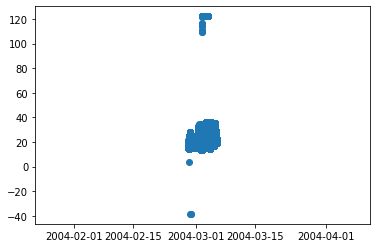

In [3]:
dfnew = pd.read_csv('../dataset/TempData.csv')#.between_time('08:00','09:00')
dfnew['Datetime'] = pd.to_datetime(dfnew['Datetime'])
dfnew.set_index('Datetime', inplace=True)

# Choose data between 28-02-2004 to 05-03-2004
df7 = dfnew['2004-02-28':'2004-03-05']
plt.scatter(df7.index, df7.Temp);

In [4]:
print(df7[df7['Temp']>50].ID.value_counts())
df7.ID.value_counts()[15]
# ID 15 is errornous and not in test data Thus ID 15 data will be removed

15    356
Name: ID, dtype: int64


2337

In [5]:
print(df7[df7['Temp']<5].ID.value_counts())
df7.ID.value_counts()[20]

# Negligible errors, just the errornous entries will be removed

20    3
2     1
Name: ID, dtype: int64


16989

In [6]:
df7_1 = df7[df7['ID']!=15]
df7_2 = df7_1[df7_1['Temp']>5]
df7_2 = df7_2['2004-02-28':'2004-03-05']

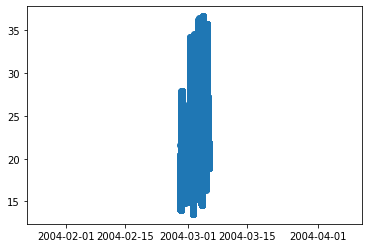

In [7]:
plt.scatter(df7_2.index, df7_2.Temp)

In [8]:
df7_2.to_pickle('../dataset/TempData.pickle')